
# Week 04 – Image Processing Assignment

## Topics Covered
- Power Law Transformation (Gamma Correction)
- Image Negative
- Gamma Curves Analysis
- Intensity Range Mapping
- Practical Image Enhancement Techniques

**Student Name:**         Rustam

**Student ID:**           230219  

**Course:**               Digital Image Processing

**Instructor:**           Professor Kiani Behnam

**Date:** 21 February 2026

---

## Submission Rules
- All solutions must be implemented in code.
- Output images must be clearly displayed.
- Code must be clean and well-structured.
- No theoretical explanation sections required.

---



# Part 1 – Power Law Transformation (Gamma Correction)

### Challenge 1.1
Implement a function `gamma_correction(image, gamma)` from scratch.

Requirements:
- Normalize image to [0,1]
- Apply power-law transformation
- Convert back to uint8
- Display original and corrected image side by side

---


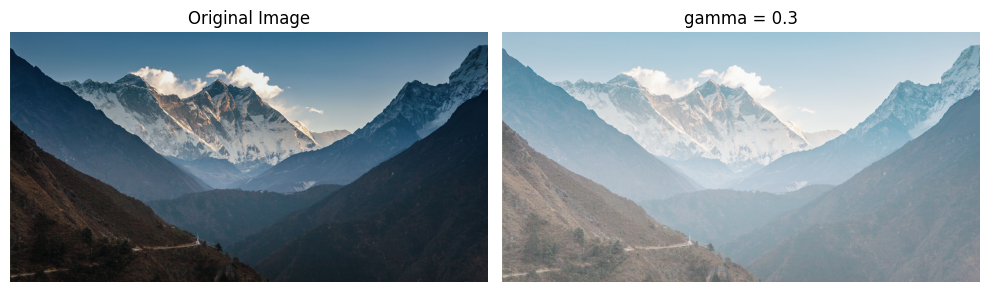

In [30]:
# Implement gamma_correction function here
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('mountain.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

def gamma_correction(image, gamma):
    img = image / 255.0
    result = img ** gamma
    result = (result * 255).astype(np.uint8)
    return result

corrected = gamma_correction(image, 0.3)

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(corrected, cmap='gray')
plt.title("gamma = 0.3")
plt.axis('off')

plt.tight_layout()
plt.show()


### Challenge 1.2 – Gamma Curve Analysis

1. Generate intensity values r in range [0,1].
2. Plot gamma curves for at least 5 different gamma values.
3. Ensure all curves appear in one plot.

---


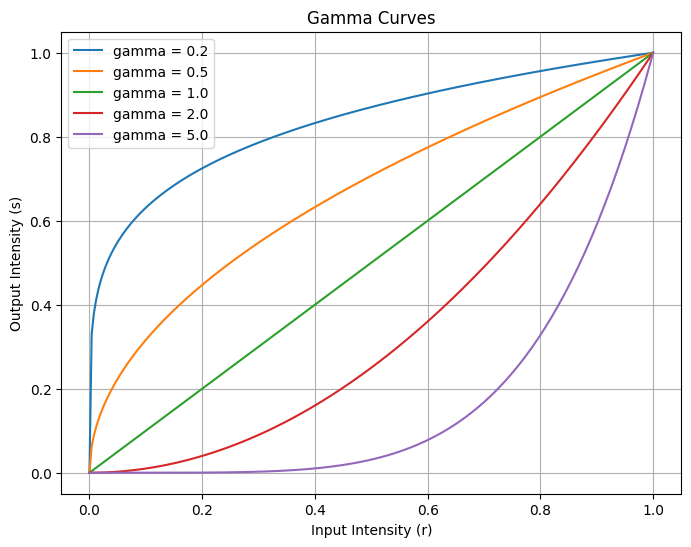

In [31]:
# Plot gamma curves here
r = np.linspace(0, 1, 256)
gamma_values = [0.2, 0.5, 1.0, 2.0, 5.0]
plt.figure(figsize=(8, 6))

for g in gamma_values:
    s = r ** g
    plt.plot(r, s, label="gamma = " + str(g))

plt.xlabel("Input Intensity (r)")
plt.ylabel("Output Intensity (s)")
plt.title("Gamma Curves")
plt.legend()
plt.grid(True)
plt.show()


### Challenge 1.3 – Comparative Study

Apply gamma values:
- 0.5
- 1.0
- 2.0

Display results in a structured layout.
Add titles clearly indicating gamma value.

---


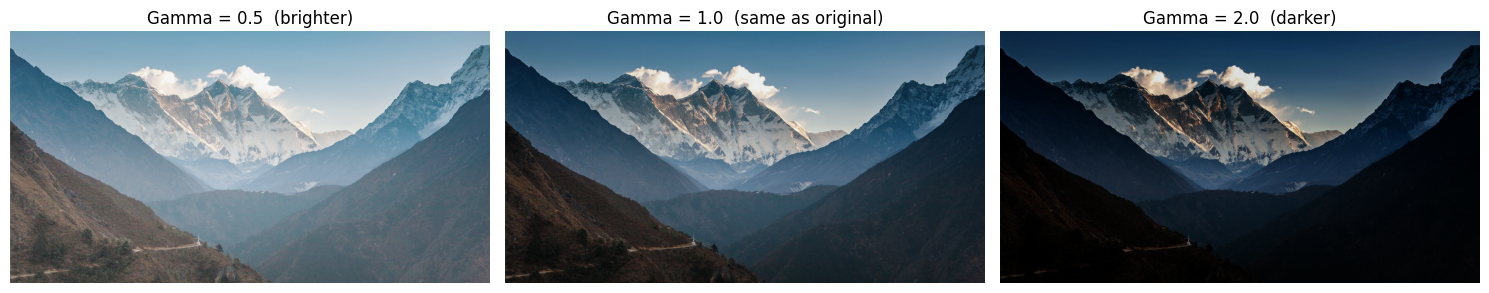

In [32]:
# Comparative gamma correction implementation
def gamma_correction(image, gamma):
    img = image / 255.0
    result = img ** gamma
    return (result * 255).astype(np.uint8)

gamma_05 = gamma_correction(image, 0.5)
gamma_10 = gamma_correction(image, 1.0)
gamma_20 = gamma_correction(image, 2.0)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(gamma_05)
plt.title("Gamma = 0.5  (brighter)")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(gamma_10)
plt.title("Gamma = 1.0  (same as original)")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(gamma_20)
plt.title("Gamma = 2.0  (darker)")
plt.axis('off')

plt.tight_layout()
plt.show()


# Part 2 – Basic Intensity Transformations

### Challenge 2.1 – Image Negative

Create an image negative function without using built-in shortcuts.

Formula must be implemented manually.

---


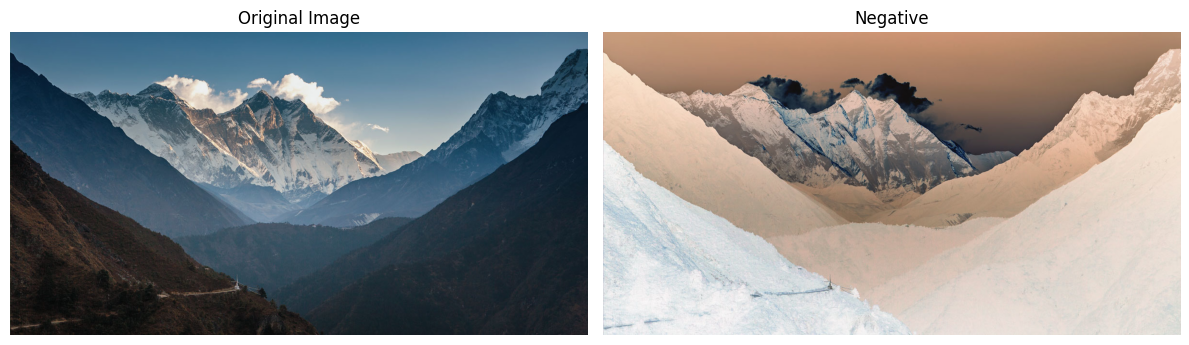

In [33]:
# Implement image negative transformation
def image_negative(image):
    negative = 255 - image
    return negative.astype(np.uint8)

neg = image_negative(image)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(neg)
plt.title("Negative")
plt.axis('off')

plt.tight_layout()
plt.show()


### Challenge 2.2 – Intensity Range Mapping

Set pixel intensity range [A, B] to white (255).

Requirements:
- Accept A and B as parameters.
- Leave other pixels unchanged.
- Display before and after.

---


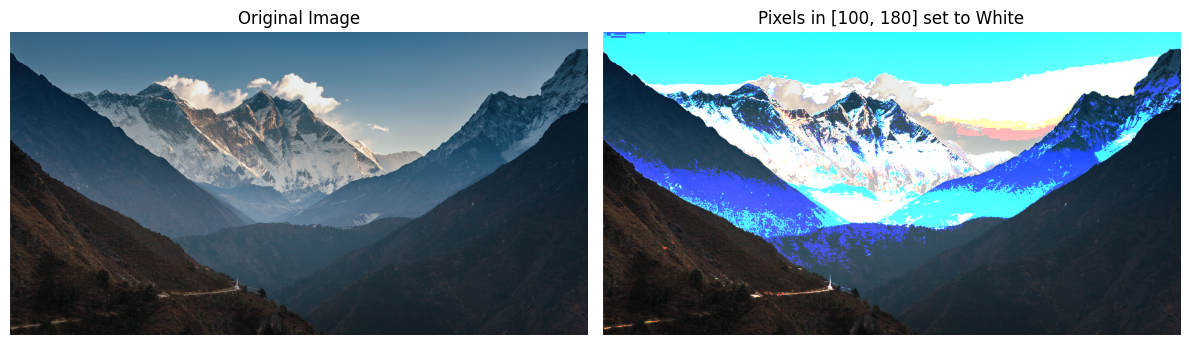

In [34]:
# Implement intensity range mapping
def intensity_range_mapping(image, A, B):
    result = image.copy()
    mask = (image >= A) & (image <= B)
    result[mask] = 255
    return result

A = 100
B = 180
mapped = intensity_range_mapping(image, A, B)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(mapped)
plt.title("Pixels in [100, 180] set to White")
plt.axis('off')

plt.tight_layout()
plt.show()


### Challenge 2.3 – Integrated Enhancement

Create a pipeline that:
1. Reads image
2. Applies gamma correction
3. Applies intensity mapping
4. Displays final enhanced image

---


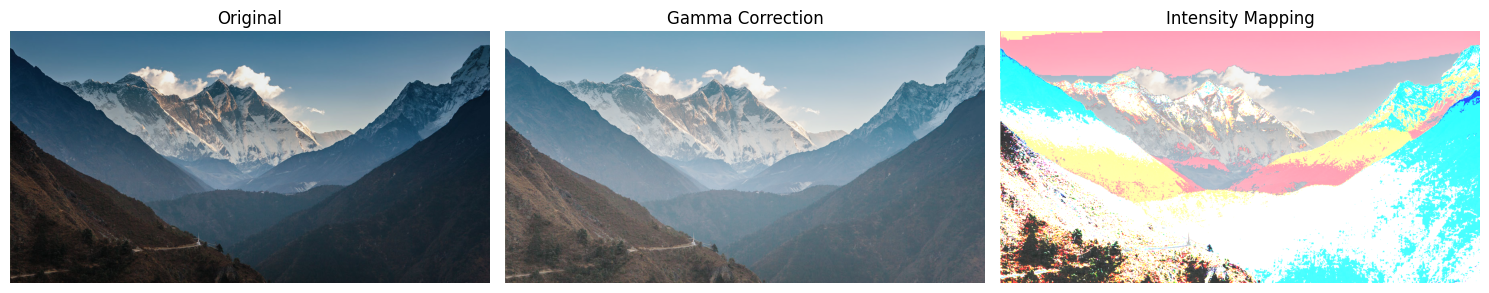

In [36]:
# Build full enhancement pipeline
def gamma_correction(image, gamma):
    img = image / 255.0
    result = img ** gamma
    return (result * 255).astype(np.uint8)

def intensity_range_mapping(image, A, B):
    result = image.copy()
    mask = (image >= A) & (image <= B)
    result[mask] = 255
    return result

step1 = image
step2 = gamma_correction(step1, gamma=0.5)
step3 = intensity_range_mapping(step2, A=80, B=160)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(step1)
plt.title("Original")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(step2)
plt.title("Gamma Correction")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(step3)
plt.title("Intensity Mapping")
plt.axis('off')

plt.tight_layout()
plt.show()


# Part 3 – Advanced Optimization Challenge

### Challenge 3.1 – Performance & Robustness

Improve your functions by:

- Adding input validation
- Handling grayscale and RGB images
- Avoiding redundant computations
- Structuring reusable functions

---

### Final Task

Create one clean final script that performs:
- Gamma analysis
- Negative transformation
- Intensity mapping
- Final comparison visualization

---


In [ ]:
# Final optimized solution
def gamma_correction(image, gamma):
    img = image / 255.0
    result = img ** gamma
    return (result * 255).astype(np.uint8)

def image_negative(image):
    return (255 - image).astype(np.uint8)

def intensity_range_mapping(image, A, B):
    result = image.copy()
    result[(image >= A) & (image <= B)] = 255
    return result

# ---- gamma curve analysis ----
r = np.linspace(0, 1, 256)
plt.figure(figsize=(7, 5))
for g in [0.2, 0.5, 1.0, 2.0, 5.0]:
    plt.plot(r, r ** g, label="gamma = " + str(g))
plt.title("Gamma Curves")
plt.xlabel("Input"); plt.ylabel("Output")
plt.legend(); plt.grid(True)
plt.show()

# ---- apply all transformations ----
gc_dark  = gamma_correction(image, 2.0)
gc_light = gamma_correction(image, 0.5)
neg      = image_negative(image)
mapped   = intensity_range_mapping(image, 100, 200)
pipeline = intensity_range_mapping(gamma_correction(image, 0.5), 80, 160)

# ---- final comparison ----
plt.figure(figsize=(15, 9))

images = [image, gc_light, gc_dark, neg, mapped, pipeline]
titles = [
    "Original",
    "Gamma = 0.5 (brighter)",
    "Gamma = 2.0 (darker)",
    "Image Negative",
    "Range Mapping [100-200]",
    "Full Pipeline"
]

for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(images[i])
    plt.title(titles[i])
    plt.axis('off')

plt.suptitle("Final Comparison of All Transformations", fontsize=15)
plt.tight_layout()
plt.show()